In [96]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [97]:
cereal_df = pd.read_csv("./data-set/cereal.csv")
cereal_df

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Triples,G,C,110,2,1,250,0.0,21.0,3,60,25,3,1.0,0.75,39.106174
73,Trix,G,C,110,1,1,140,0.0,13.0,12,25,25,2,1.0,1.00,27.753301
74,Wheat Chex,R,C,100,3,1,230,3.0,17.0,3,115,25,1,1.0,0.67,49.787445
75,Wheaties,G,C,100,3,1,200,3.0,17.0,3,110,25,1,1.0,1.00,51.592193


# Data description

## Columns
- Name: Name of cereal
- mfr: Manufacturer of cereal
    - A = American Home Food Products
    - G = General Mills
    - K = Kelloggs
    - N = Nabisco
    - P = Post
    - Q = Quaker Oats
    - R = Ralston Purina
- type:
    - cold
    - hot
- calories: calories per serving
- protein: grams of protein
- fat: grams of fat
- sodium: milligrams of sodium
- fiber: grams of dietary fiber
- carbo: grams of complex carbohydrates
- sugars: grams of sugars
- potass: milligrams of potassium
- vitamins: vitamins and minerals - 0, 25, or 100, indicating the typical percentage of FDA recommended
- shelf: display shelf (1, 2, or 3, counting from the floor)
- weight: weight in ounces of one serving
- cups: number of cups in one serving
- rating: a rating of the cereals (Possibly from Consumer Reports?)

1 ounce = 28.3495 grams


In [98]:
# Peek the top 5 rows of the dataframe
cereal_df.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


In [99]:
# Check whether all the data in column 'name' are unique
# create a empty list to hold the data
name = []
count = 0
for i in range(len(cereal_df)):

    # use .loc method to get the list of data in 'name' columns
    # if the current name not in the name[] array list, then count+=1
    if not cereal_df.loc[:, 'name'][i] in name:
        name.append(cereal_df.loc[:, 'name'][i])
        print(cereal_df.loc[:, 'name'][i])
        count += 1
count

100% Bran
100% Natural Bran
All-Bran
All-Bran with Extra Fiber
Almond Delight
Apple Cinnamon Cheerios
Apple Jacks
Basic 4
Bran Chex
Bran Flakes
Cap'n'Crunch
Cheerios
Cinnamon Toast Crunch
Clusters
Cocoa Puffs
Corn Chex
Corn Flakes
Corn Pops
Count Chocula
Cracklin' Oat Bran
Cream of Wheat (Quick)
Crispix
Crispy Wheat & Raisins
Double Chex
Froot Loops
Frosted Flakes
Frosted Mini-Wheats
Fruit & Fibre Dates; Walnuts; and Oats
Fruitful Bran
Fruity Pebbles
Golden Crisp
Golden Grahams
Grape Nuts Flakes
Grape-Nuts
Great Grains Pecan
Honey Graham Ohs
Honey Nut Cheerios
Honey-comb
Just Right Crunchy  Nuggets
Just Right Fruit & Nut
Kix
Life
Lucky Charms
Maypo
Muesli Raisins; Dates; & Almonds
Muesli Raisins; Peaches; & Pecans
Mueslix Crispy Blend
Multi-Grain Cheerios
Nut&Honey Crunch
Nutri-Grain Almond-Raisin
Nutri-grain Wheat
Oatmeal Raisin Crisp
Post Nat. Raisin Bran
Product 19
Puffed Rice
Puffed Wheat
Quaker Oat Squares
Quaker Oatmeal
Raisin Bran
Raisin Nut Bran
Raisin Squares
Rice Chex
Rice Kr

77

All name are unique.

# Analyze data

## Analyze sugar data

<strong> Our target </strong>
<br>
Sugar: 6 grams or less per dry ounce

Convert columns of sugars_per_ounce to float

In [100]:
# Initialize list for holding the data 
sugars_per_ounce = []

for i in range(len(cereal_df)):
    # we need the sugars to be grams per ounce
    # but current weight is ounces per one serving
    # sugars data divide weight data will get what we want
    num = cereal_df.loc[:, 'sugars'][i] / cereal_df.loc[:, 'weight'][i]
    
    # convert to float
    # and append to the list we initialized
    num = float("%.1f" % num)
    sugars_per_ounce.append(num)
    
# Insert columns 'sugars_per_ounce' into the end of original dataframe
cereal_df.insert(len(cereal_df.columns), "sugars_per_ounce", sugars_per_ounce, True)

cereal_df.head(20)


,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,sugars_per_ounce
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.00,0.33,68.402973,6.0
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.00,1.00,33.983679,8.0
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.00,0.33,59.425505,5.0
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.00,0.50,93.704912,0.0
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.00,0.75,34.384843,8.0
5,Apple Cinnamon Cheerios,G,C,110,2,2,180,1.5,10.5,10,70,25,1,1.00,0.75,29.509541,10.0
6,Apple Jacks,K,C,110,2,0,125,1.0,11.0,14,30,25,2,1.00,1.00,33.174094,14.0
7,Basic 4,G,C,130,3,2,210,2.0,18.0,8,100,25,3,1.33,0.75,37.038562,6.0
8,Bran Chex,R,C,90,2,1,200,4.0,15.0,6,125,25,1,1.00,0.67,49.120253,6.0
9,Bran Flakes,P,C,90,3,0,210,5.0,13.0,5,190,25,3,1.00,0.67,53.313813,5.0



<ul>
    <li>Group sugars_per_ounce by manufacturer</li>
</ul>

In [101]:
# group the data base on mfr(manufacturers)
# the sugars_per_ounce in same manufacturers group will be calculated by np.mean
cereal_df.groupby(['mfr']).agg({'sugars_per_ounce': np.mean})['sugars_per_ounce']


mfr
A    3.000000
G    7.559091
K    6.952174
N    1.833333
P    8.166667
Q    5.250000
R    6.125000
Name: sugars_per_ounce, dtype: float64

<AxesSubplot:xlabel='Manufacturer'>

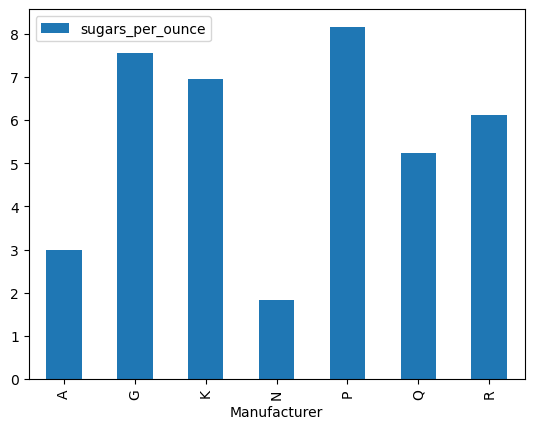

In [102]:
df = cereal_df.groupby(by = ['mfr']).agg({'sugars_per_ounce': np.mean})

# plot the data frame using bar chart
df.plot(kind='bar', xlabel='Manufacturer')



## Analyze fiber data

Want to find the cereal contains more fiber.

In [103]:
cereal_df.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,sugars_per_ounce
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973,6.0
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679,8.0
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505,5.0
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912,0.0
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843,8.0


In [104]:
# check if the data in columns 'fiber' is float type
type(cereal_df.loc[:, 'fiber'][0])

numpy.float64

In [105]:
fiber_per_ounce = []

for i in range(len(cereal_df)):
    
    num = cereal_df.loc[:, 'fiber'][i] / cereal_df.loc[:, 'weight'][i]
    
    # convert to float
    # and append to the list we initialized
    num = float("%.1f" % num)
    fiber_per_ounce.append(num)
    
# Insert columns 'sugars_per_ounce' into the end of original dataframe
cereal_df.insert(len(cereal_df.columns), "fiber_per_ounce", fiber_per_ounce, True)

cereal_df.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,sugars_per_ounce,fiber_per_ounce
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973,6.0,10.0
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679,8.0,2.0
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505,5.0,9.0
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912,0.0,14.0
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843,8.0,1.0


In [106]:
cereal_df.groupby(by = ['mfr']).agg({'fiber_per_ounce': np.mean})

,fiber_per_ounce
mfr,
A,0.000000
G,1.177273
K,2.539130
N,4.100000
P,2.500000
Q,1.462500
R,1.875000


<AxesSubplot:xlabel='Manufacturer'>

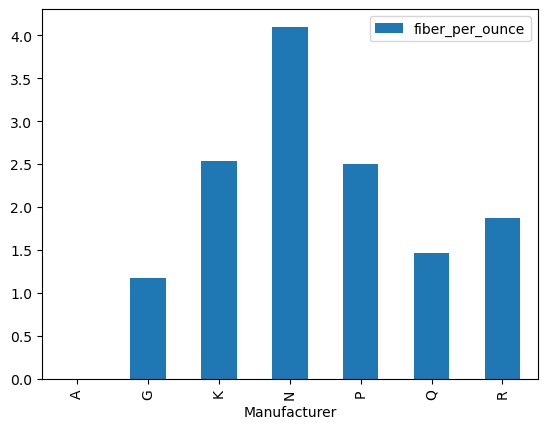

In [107]:
# group the dataframe based on the mfr(manufacturer) 
df = cereal_df.groupby(by = ['mfr']).agg({'fiber_per_ounce': np.mean})

# plot the data using bar chart
df.plot(kind='bar', xlabel='Manufacturer')


## Analyze calories data

In [108]:
cereal_df.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,sugars_per_ounce,fiber_per_ounce
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973,6.0,10.0
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679,8.0,2.0
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505,5.0,9.0
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912,0.0,14.0
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843,8.0,1.0


In [109]:
# check all data in calories columns ate integer type
flag = 1
for i in range(len(cereal_df)):
    if not isinstance(cereal_df.loc[:, "calories"][i], np.int64):
        flag = 0
        print(type(cereal_df.loc[:, "calories"][i]))
        break

if flag:
    print("All calories data are numpy.int64.")
        

All calories data are numpy.int64.


In [110]:
calories_per_ounce = []

for i in range(len(cereal_df)):
    
    num = cereal_df.loc[:, 'calories'][i] / cereal_df.loc[:, 'weight'][i]
    
    # convert to float
    # and append to the list we initialized
    num = float("%.1f" % num)
    calories_per_ounce.append(num)
    
# Insert columns 'sugars_per_ounce' into the end of original dataframe
cereal_df.insert(len(cereal_df.columns), "calories_per_ounce", calories_per_ounce, True)

cereal_df.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,sugars_per_ounce,fiber_per_ounce,calories_per_ounce
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973,6.0,10.0,70.0
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679,8.0,2.0,120.0
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505,5.0,9.0,70.0
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912,0.0,14.0,50.0
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843,8.0,1.0,110.0


In [111]:
df = cereal_df.groupby(by = ["mfr"]).agg({"calories_per_ounce" : np.mean})
df

,calories_per_ounce
mfr,
A,100.000000
G,106.590909
K,100.873913
N,89.400000
P,102.911111
Q,107.500000
R,115.000000


<AxesSubplot:xlabel='Manufacturer'>

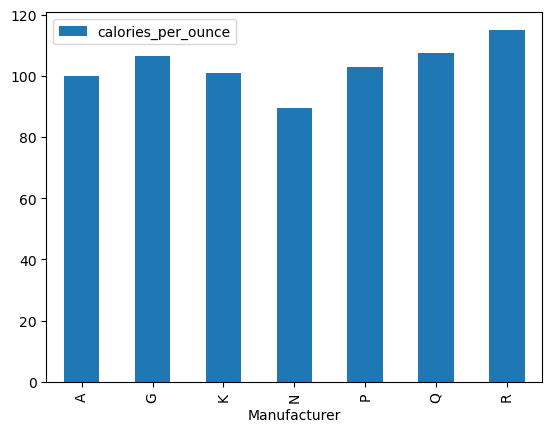

In [112]:
df = cereal_df.groupby(by = ["mfr"]).agg({"calories_per_ounce" : np.mean})
df.plot(kind="bar", xlabel="Manufacturer")

There's the least amount of calories in the cereals of manufacturer N.

# Conclusion

Base on the sugar, fiber and calories analysis, we should choose the cereals of manufacturer N.